In [87]:
import numpy as np
import cvxopt
import cv2
import os 
import random
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt import solvers
import face_recognition
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import scipy.stats as st
from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import fsolve
import testjx
import pandas as pd
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
import pandas as pd
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from statsmodels.discrete.discrete_model import Logit, Probit, MNLogit
from pylab import mpl

import warnings
import matplotlib as mpl
from sklearn.metrics import accuracy_score
from imbalanced_ensemble.ensemble import SelfPacedEnsembleClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import balanced_accuracy_score
warnings.filterwarnings('ignore')

# Generating a mean-uncertain imbalanced data

In [332]:
'''Random nomarl data'''
np.random.seed(1234)
X=np.random.normal(0,1,1200).reshape(1,1200)

In [33]:
beta_0=np.array([-7,-6,-5,-4,-3,-2,-1,1])
X_beta=np.vstack((X+k for k in beta_0))

In [4]:
'''Mean-uncertain data'''
np.random.seed(17)
beta_0=np.random.uniform(-5,1,5)
intercept=np.repeat(beta_0,240)
X_beta=X.reshape(1200,)+intercept

In [6]:
def sigmoid_(x,u):
    return 1/(1+np.exp(-x-u))
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
'''Mean-uncertain label'''
u=[]

for k in range(1200):
    ran=np.random.uniform(0,1,1)
    if ran <=sigmoid(X_beta)[k]:  
        u.append(1)
    else:u.append(0)
        
    

In [9]:
u=np.array(u)

In [12]:
-np.log(train_label[train_label==1].shape[0]/(1000-train_label[train_label==1].shape[0]))

2.3762728087852047

In [333]:
'''Shuffle the data and split it in train and test'''
np.random.seed(17)
per_ = np.random.permutation(X.reshape(1200,)[:-200].shape[0])

train= X.reshape(1200,)[:-200][per_]
train_label = u[:-200][per_]
X_train=np.c_[train.reshape(-1,1),np.ones(1000)]
x_tr,y_tr=train.reshape(-1,1),train_label

In [334]:
X_t=X.reshape(-1,1)
x_te,y_te=X_t[-200:],u[-200:]
X_test=np.c_[x_te.reshape(-1,1),np.ones(y_te.shape[0])]

In [1484]:
pd.DataFrame(X_train).to_excel('trainset.xls')
pd.DataFrame(train_label).to_excel('trainlabel.xls')
pd.DataFrame(X_1[-200:]).to_excel('testset.xls')
pd.DataFrame(u[-200:]).to_excel('testlabel.xls')

In [23]:
X_1=np.c_[X_t,np.ones(1200)]

In [24]:
n=train_label[train_label==1].shape[0]
c_1=np.concatenate((X_train[train_label==0],X_train[train_label==1]))
l_1=np.concatenate((np.array([0]*(1000-n)),np.array([1]*n)))
m=int((1000-n)/9)
indice=[k*m for k in range(1,9)]
indice.append(1000-n)
pre_X=np.array(np.split(c_1,indice))
pre_Y=np.array(np.split(l_1,indice))

In [569]:
'''LR result'''
import time
start_i=time.time()
model_in=LogisticRegression()
model_in.fit(train.reshape(-1,1),train_label)
end_i=time.time()

y_test_label=model_in.predict(x_te)


from sklearn.metrics import classification_report
print(classification_report(u[-200:],y_test_label))
bacc=balanced_accuracy_score(u[-200:],y_test_label)
fbeta=fbeta_score(u[-200:],y_test_label,beta=2.94)
recall=recall_score(u[-200:],y_test_label)
print('Classifier :LR')
print("Running time:%.2f"%(end_i-start_i))
# from sklearn.metrics import accuracy_score
print('Balanced-Accuracy on testing set：{:.2%}'.format(balanced_accuracy_score(u[-200:],y_test_label)))
print('Recall on testing set：{:.2%}'.format(recall_score(u[-200:],y_test_label)))
print('F-measure on testing set：{:.2%}'.format(fbeta_score(u[-200:],y_test_label,beta=2.94)))
print('Score:{:.3}'.format(np.mean([recall,bacc,fbeta])*0.99+0.01/(end_i-start_i)))


              precision    recall  f1-score   support

           0       0.55      1.00      0.71       110
           1       0.00      0.00      0.00        90

    accuracy                           0.55       200
   macro avg       0.28      0.50      0.35       200
weighted avg       0.30      0.55      0.39       200

Classifier :LR
Running time:0.00
Balanced-Accuracy on testing set：50.00%
Recall on testing set：0.00%
F-measure on testing set：0.00%
Score:2.19


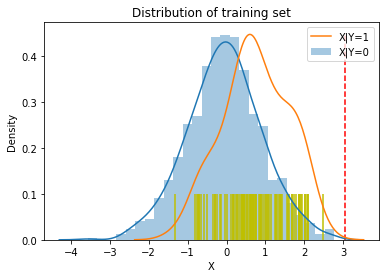

In [584]:
'''LR boundary line and distribution'''
sns.distplot(X_train[:,0][train_label==0],label='X|Y=0')
sns.distplot(X_train[:,0][train_label==1],hist=False,label='X|Y=1')
# plt.vlines(train[train_label==0],0,0.1)
plt.vlines(X_train[:,0][train_label==1],0,0.1,'y')
plt.vlines(-model_in.intercept_/model_in.coef_,0,0.45,'r','--')
plt.title('Distribution of training set')
plt.xlabel('X')
plt.legend()

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import fbeta_score
from imblearn.under_sampling import RandomUnderSampler

In [88]:
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

In [450]:
'''List the baseline models '''
from sklearn import tree
def get_models():
	models, names = list(), list()
	# LR
	models.append(LogisticRegression())
	names.append('LR')
	# SVM
	models.append(SVC(probability=True))
	names.append('SVM')
	# Bagging
	models.append(BaggingClassifier(n_estimators=100,random_state=0))
	names.append('BAG')
	models.append(AdaBoostClassifier(random_state=0))
	names.append('Adaboost')
	# RF
	models.append(
	tree.DecisionTreeClassifier(
                               random_state=0))
	names.append('CART')
	models.append(RandomForestClassifier(random_state=0))
	names.append('RF')

	models.append(MLPClassifier(random_state=0, max_iter=200,hidden_layer_sizes=(50,)))
    
	names.append('MLP')

	return models, names

import time
def evaluate_model(X,y,model):

    pipeline = model
    import time
    start=time.time()
    pipeline.fit(X,y)
    end=time.time()
    prdict_y=pipeline.predict(X_t[-200:])
    prob_y=pipeline.predict_proba(X_t[-200:])
    rec=recall_score(u[-200:],prdict_y)
    G_m=np.sqrt(recall_score(u[-200:],prdict_y)*recall_score(u[-200:],prdict_y,pos_label=0))
    pre=precision_score(u[-200:],prdict_y)
    bacc=balanced_accuracy_score(u[-200:],prdict_y)
    fbeta=fbeta_score(u[-200:],prdict_y,beta=1)




    return G_m,bacc,fbeta,rec,pre,end-start
import time


In [85]:
'''Evaluate the baseline models'''
from imblearn.over_sampling import SMOTE
from sklearn.metrics import fbeta_score
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
models, names = get_models()

for i in range(len(models)):
	result = evaluate_model(train.reshape(-1,1),train_label,models[i])

	G_mean=result[0]
	Bacc=result[1]
	recall=result[3]
	Fbeta=result[2]
	T=result[-1]
	acc_s=np.mean(np.array(result)[:4])
	print('>%s: Average G-mean:%.3f ' % (names[i],G_mean))
	print('>%s: Average Balanced_Acc: %.3f ' % (names[i],Bacc))
	print('>%s: Average Fbeta: %.3f' % (names[i],Fbeta))
	print('>%s: Average Recall: %.3f' % (names[i],recall))    
	print('>%s: Average Training time: %.3f' % (names[i],T))
	print('>%s: Average accuracy_score: %.3f' % (names[i],acc_s))
	print('>%s: Average Score: %.3f' % (names[i],0.99*acc_s+0.01/(T*0.9+1)))
          

>LR: Average G-mean:0.000 
>LR: Average Balanced_Acc: 0.500 
>LR: Average Fbeta: 0.000
>LR: Average Recall: 0.000
>LR: Average Training time: 0.004
>LR: Average accuracy_score: 0.125
>LR: Average Score: 0.134
>SVM: Average G-mean:0.000 
>SVM: Average Balanced_Acc: 0.500 
>SVM: Average Fbeta: 0.000
>SVM: Average Recall: 0.000
>SVM: Average Training time: 0.044
>SVM: Average accuracy_score: 0.125
>SVM: Average Score: 0.133
>BAG: Average G-mean:0.361 
>BAG: Average Balanced_Acc: 0.522 
>BAG: Average Fbeta: 0.228
>BAG: Average Recall: 0.144
>BAG: Average Training time: 0.218
>BAG: Average accuracy_score: 0.314
>BAG: Average Score: 0.319
>Adaboost: Average G-mean:0.149 
>Adaboost: Average Balanced_Acc: 0.511 
>Adaboost: Average Fbeta: 0.043
>Adaboost: Average Recall: 0.022
>Adaboost: Average Training time: 0.065
>Adaboost: Average accuracy_score: 0.181
>Adaboost: Average Score: 0.189
>CART: Average G-mean:0.361 
>CART: Average Balanced_Acc: 0.522 
>CART: Average Fbeta: 0.228
>CART: Average 

In [452]:
'''Evaluate the baseline models+SMOTE'''
from imblearn.over_sampling import SMOTE
from sklearn.metrics import fbeta_score
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
smotesample=SMOTE(random_state=0)

resample_x,resample_y=smotesample.fit_resample(x_tr,y_tr)

models, names = get_models()

for i in range(len(models)):
	result = evaluate_model(resample_x,resample_y,models[i])

	G_mean=result[0]
	Bacc=result[1]
# summarize performance
	recall=result[3]
	Fbeta=result[2]
	T=result[-1]
	acc_s=np.mean(np.array(result)[:4])
	# summarize and store
	print('>%s: Average G-mean:%.3f ' % ('SMOTE'+names[i],G_mean))
	print('>%s: Average Balanced_Acc: %.3f ' % ('SMOTE'+names[i],Bacc))
	print('>%s: Average Fbeta: %.3f' % ('SMOTE'+names[i],Fbeta))
	print('>%s: Average Recall: %.3f' % ('SMOTE'+names[i],recall))    
	print('>%s: Average Training time: %.3f' % ('SMOTE'+names[i],T))
	print('>%s: Average accuracy_score: %.3f' % ('SMOTE'+names[i],acc_s))
	print('>%s: Average Score: %.3f' % ('SMOTE'+names[i],0.99*acc_s+0.01/(T*0.9+1)))
          

>SMOTELR: Average G-mean:0.654 
>SMOTELR: Average Balanced_Acc: 0.674 
>SMOTELR: Average Fbeta: 0.597
>SMOTELR: Average Recall: 0.511
>SMOTELR: Average Training time: 0.016
>SMOTELR: Average accuracy_score: 0.609
>SMOTELR: Average Score: 0.613
>SMOTESVM: Average G-mean:0.661 
>SMOTESVM: Average Balanced_Acc: 0.676 
>SMOTESVM: Average Fbeta: 0.608
>SMOTESVM: Average Recall: 0.533
>SMOTESVM: Average Training time: 0.667
>SMOTESVM: Average accuracy_score: 0.619
>SMOTESVM: Average Score: 0.619
>SMOTEBAG: Average G-mean:0.593 
>SMOTEBAG: Average Balanced_Acc: 0.607 
>SMOTEBAG: Average Fbeta: 0.531
>SMOTEBAG: Average Recall: 0.478
>SMOTEBAG: Average Training time: 0.287
>SMOTEBAG: Average accuracy_score: 0.552
>SMOTEBAG: Average Score: 0.555
>SMOTEAdaboost: Average G-mean:0.615 
>SMOTEAdaboost: Average Balanced_Acc: 0.631 
>SMOTEAdaboost: Average Fbeta: 0.553
>SMOTEAdaboost: Average Recall: 0.489
>SMOTEAdaboost: Average Training time: 0.089
>SMOTEAdaboost: Average accuracy_score: 0.572
>SMOT

In [455]:
'''Evaluate the baseline models+RUS'''
russample=RandomUnderSampler(random_state=0)
rus_x,rus_y=russample.fit_resample(x_tr,y_tr)
models, names = get_models()
# from sklearn.neural_network import MLPClassifier
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	result = evaluate_model(rus_x,rus_y,models[i])

	G_mean=result[0]
	Bacc=result[1]
# summarize performance
	recall=result[3]
	Fbeta=result[2]
	T=result[-1]
	acc_s=np.mean(np.array(result)[:4])
	# summarize and store
	print('>%s: Average G-mean:%.3f ' % ('RUS'+names[i],G_mean))
	print('>%s: Average Balanced_Acc: %.3f ' % ('RUS'+names[i],Bacc))
	print('>%s: Average Fbeta: %.3f' % ('RUS'+names[i],Fbeta))
	print('>%s: Average Recall: %.3f' % ('RUS'+names[i],recall))    
	print('>%s: Average Training time: %.3f' % ('RUS'+names[i],T))
	print('>%s: Average accuracy_score: %.3f' % ('RUS'+names[i],acc_s))
	print('>%s: Average Score: %.3f' % ('RUS'+names[i],0.99*acc_s+0.01/(T*0.9+1)))
          

>RUSLR: Average G-mean:0.647 
>RUSLR: Average Balanced_Acc: 0.668 
>RUSLR: Average Fbeta: 0.588
>RUSLR: Average Recall: 0.500
>RUSLR: Average Training time: 0.002
>RUSLR: Average accuracy_score: 0.601
>RUSLR: Average Score: 0.605
>RUSSVM: Average G-mean:0.632 
>RUSSVM: Average Balanced_Acc: 0.657 
>RUSSVM: Average Fbeta: 0.570
>RUSSVM: Average Recall: 0.478
>RUSSVM: Average Training time: 0.016
>RUSSVM: Average accuracy_score: 0.584
>RUSSVM: Average Score: 0.588
>RUSBAG: Average G-mean:0.615 
>RUSBAG: Average Balanced_Acc: 0.619 
>RUSBAG: Average Fbeta: 0.571
>RUSBAG: Average Recall: 0.556
>RUSBAG: Average Training time: 0.176
>RUSBAG: Average accuracy_score: 0.590
>RUSBAG: Average Score: 0.593
>RUSAdaboost: Average G-mean:0.607 
>RUSAdaboost: Average Balanced_Acc: 0.618 
>RUSAdaboost: Average Fbeta: 0.549
>RUSAdaboost: Average Recall: 0.500
>RUSAdaboost: Average Training time: 0.065
>RUSAdaboost: Average accuracy_score: 0.568
>RUSAdaboost: Average Score: 0.572
>RUSCART: Average G-mean

# max-mean loss method

In [201]:
'''Data-progressing'''
def split(x,y):
    k=int(y.shape[0]/sum(y))-1
    n=y[y==1].shape[0]
    m=int((x.shape[0]-n)/k)
    indice=[i*m for i in range(1,k)]
    indice.append(x.shape[0]-n)
    x_c=np.concatenate((x[y==0],x[y==1]))
    y_c=np.concatenate((np.array([0]*(x.shape[0]-n)),np.array([1]*n)))
    return np.array(np.split(x_c,indice)),np.array(np.split(y_c,indice))

In [200]:
''' Class solution_XX() is the algorithm based on Xiaohua,Xuan[2019], the improvement is that
we add a parameter of "penalty".'''
class solution_XX:
    
    
    def __init__(self,penalty = None,Lambda = 0.03,a = 0.5,epochs = 200):
        self.W = None
        self.penalty = penalty
        self.Lambda = Lambda
        self.a = a
        self.epochs =epochs
        self.sigmoid = lambda x:1/(1 + np.exp(-x))
        


    def f_XX(self,X,Y):
        if self.penalty=='l1':f=np.array([np.mean((self.sigmoid(np.dot(x,self.W))-y)**2 )+self.Lambda*np.sum(np.abs(self.W)) for x,y in zip(X,Y)])
        elif self.penalty=='l2':f=np.array([np.mean((self.sigmoid(np.dot(x,self.W))-y)**2 )+self.Lambda*np.sum(self.W**2) for x,y in zip(X,Y)])#pre_Xtrain,pre_Ytrain
        else:f=np.array([np.mean((self.sigmoid(np.dot(x,self.W))-y)**2 ) for x,y in zip(X,Y)])

        return f         
    def Gf_XX(self,X,Y):#To compute the Derivative matrix, the shape of which is N*2
        if self.penalty=='l1':d=np.array([x.T.dot(0.02*(self.sigmoid(np.dot(x,self.W))-y)*self.sigmoid(np.dot(x,self.W))*(1-self.sigmoid(np.dot(x,self.W))))+self.Lambda*np.sign(self.W )for x,y in zip(X,Y)])
        elif self.penalty=='l2':
            d=np.array([x.T.dot(0.02*(self.sigmoid(np.dot(x,self.W))-y)*self.sigmoid(np.dot(x,self.W))*(1-self.sigmoid(np.dot(x,self.W))))+2*self.Lambda*self.W for x,y in zip(X,Y)])
        else:d=np.array([x.T.dot(0.02*(self.sigmoid(np.dot(x,self.W))-y)*self.sigmoid(np.dot(x,self.W))*(1-self.sigmoid(np.dot(x,self.W)))) for x,y in zip(X,Y)])
        return d
    def direction_XX(self,X,Y):
        gra=self.Gf_XX(X,Y)
        p=matrix(gra.dot(gra.T),tc='d')
        q=matrix(-self.f_XX(X,Y),tc='d')
        G=matrix(np.diag(np.array([-1]*(Y.shape[0]))),tc='d')#N=20
        h=matrix(np.array([[0]]*(Y.shape[0])),tc='d')
        A=matrix([[1.0]]*(Y.shape[0]))
        b=matrix([1.0])
        solvers.options['show_progress'] = False
        sol = solvers.qp(p,q,G,h,A,b)
        t=np.array(sol['x'])
        d= -(gra.T.dot(t))
        return d.reshape((X_train.shape[-1],))

    def fit(self,X,Y):
        
        call=[]
        pre=[]
        loss=[]
        testloss=[]
        np.random.seed(1324)
        self.W=np.random.random((X_train.shape[-1],))*2-1
        n=y_te[y_te==1.].shape[0]
        for k in range(200):
            d=self.direction_XX(X,Y)
            if np.linalg.norm(d)//10**(-7) < 25:
                break
            sigma=0.8
            f_1=np.max(self.f_XX(X,Y))
            w=self.W
            self.W=d*sigma+w
            while np.max(self.f_XX(X,Y))>np.max(f_1):
                sigma=sigma*0.8
                self.W=d*sigma+w
            self.W=d*sigma+w

        return self.W

In [348]:
pre_X,pre_Y=split(X_train,y_tr)
modle_x = solution_XX()
s_1=time.time()
w_x= modle_x.fit(pre_X,pre_Y)
t_1=time.time()
y_pred=modle_x.sigmoid(X_test.dot(w_x))
# y_tr_pred=lrr.sigmoid(X[-400:].dot(w_x))
prdict_y=np.round(y_pred)
rec=recall_score(y_te,prdict_y)
pre=precision_score(y_te,prdict_y)
#                 bacc_tr.append(balanced_accuracy_score(y[train_index],predict_tr))
bacc=balanced_accuracy_score(y_te,prdict_y)
f1=fbeta_score(y_te,prdict_y,beta=1)
acc_s=np.mean([bacc,rec,f1])
T=t_1-s_1
print('>%s: Average Balanced_Acc: %.3f ' % ('max-mean loss',bacc))
print('>%s: Average F-measure: %.3f' % ('max-mean loss',f1))
print('>%s: Average Recall: %.3f' % ('max-mean loss',rec))    
print('>%s: Average Training time: %.3f' % ('max-mean loss',t_1-s_1))
print('>%s: Average accuracy_score: %.3f' % ('max-mean loss',acc_s))
print('>%s: Average Score: %.3f' % ('max-mean loss',0.99*acc_s+0.01/(T*0.9+1)))
print('>%s: Average accuracy: %.3f' % ('max-mean loss',acc_s))
          

>max-mean loss: Average Balanced_Acc: 0.651 
>max-mean loss: Average F-measure: 0.554
>max-mean loss: Average Recall: 0.456
>max-mean loss: Average Training time: 0.317
>max-mean loss: Average accuracy_score: 0.553
>max-mean loss: Average Score: 0.556
>max-mean loss: Average accuracy: 0.553


In [555]:
pre_X,pre_Y=split(X_train,y_tr)
modle_x_2 = solution_XX(penalty='l2')
s_1=time.time()
w_x_2= modle_x_2.fit(pre_X,pre_Y)
t_1=time.time()
y_pred=modle_x_2.sigmoid(X_test.dot(w_x_2))
# y_tr_pred=lrr.sigmoid(X[-400:].dot(w_x))
prdict_y=np.round(y_pred)
rec=recall_score(y_te,prdict_y)
pre=precision_score(y_te,prdict_y)
#                 bacc_tr.append(balanced_accuracy_score(y[train_index],predict_tr))
bacc=balanced_accuracy_score(y_te,prdict_y)
f1=fbeta_score(y_te,prdict_y,beta=1)
acc_s=np.mean([bacc,rec,f1])
T=t_1-s_1
print('>%s: Average Balanced_Acc: %.3f ' % ('max-mean loss',bacc))
print('>%s: Average F-measure: %.3f' % ('max-mean loss',f1))
print('>%s: Average Recall: %.3f' % ('max-mean loss',rec))    
print('>%s: Average Training time: %.3f' % ('max-mean loss',t_1-s_1))
print('>%s: Average accuracy_score: %.3f' % ('max-mean loss',acc_s))
print('>%s: Average Score: %.3f' % ('max-mean loss',0.99*acc_s+0.01/(T)))
print('>%s: Average accuracy: %.3f' % ('max-mean loss',acc_s))
          

>max-mean loss: Average Balanced_Acc: 0.652 
>max-mean loss: Average F-measure: 0.560
>max-mean loss: Average Recall: 0.467
>max-mean loss: Average Training time: 8.103
>max-mean loss: Average accuracy_score: 0.559
>max-mean loss: Average Score: 0.555
>max-mean loss: Average accuracy: 0.559


# Mean-uncertain max-mean method; Volatility-uncertain max-mean method

In [102]:
'''Estimate the mean-uncertainty for a given N'''
def meanuncertainty(x,n):
    r=[]
    for i in range(0,len(x)+1-n,n//10):
        r.append(np.mean(x[i:i+n]))
    return min(r),max(r)

In [298]:
'''Define the Upper predoction F_u and lower prediction F_L'''
def F_u(x,arr):
    p=[]
    for c in arr:
        
        if c <0:
            p.append(2*x[1]*st.norm.cdf(c/x[1])/(x[0]+x[1]))
        else:
            p.append(1-2*x[0]*st.norm.cdf(-c/x[0])/(x[0]+x[1]))
    return np.array(p)
def F_L(x,arr):
    p=[]
    for c in arr:
        
        if c <0:
            p.append(2*x[0]*st.norm.cdf(c/x[0])/(x[0]+x[1]))
        else:
            p.append(1-2*x[1]*st.norm.cdf(-c/x[1])/(x[0]+x[1]))
    return np.array(p)

In [385]:
'''equa_xh returns the maximal and minimal err obtained by max-mean loss for fixed window size n'''
def equa_xh(x,n,r):
            
    ini_err=train_label-sigmoid_(np.dot(X_train,w_x_2),x).reshape(X_train.shape[0],)
    for k in range(X_train.shape[0]):
    
        if train_label[k]==1:
            ini_err[k]=r*ini_err[k]
    return meanuncertainty(ini_err,n)[1]

In [386]:
'''mean-uncertainty'''
mean_xh=np.array([fsolve(lambda x: equa_xh(x,n,0.5*y_tr.shape[0]/sum(y_tr)),0.5) for n in range(10,550,10)])

In [459]:
'''equa_vxh returns the maximal and minimal err obtained by max-mean loss for fixed window size n'''

def equa_vxh(x,n,r):
    pre_in=np.dot(X_train,w_x).reshape(x_tr.shape[0],)
    err_u=y_tr-F_u(x,pre_in)
    err_L=y_tr-F_L(x,pre_in)
    for k in range(y_tr.shape[0]):
    
        if y_tr[k]==1:
            err_u[k]=r*err_u[k]
            err_L[k]=r*err_L[k]
    
    return np.array([meanuncertainty(err_u,n)[1],meanuncertainty(err_L,n)[0]])

In [253]:
'''volatility-uncertainty'''
var_xh=np.array([fsolve(lambda x: equa_vxh(x,n,0.5*y_tr.shape[0]/sum(y_tr)),[0.5,1.5]) for n in range(10,550,10)])

In [460]:
var_xh_=np.array([fsolve(lambda x: equa_vxh(x,n,2),[0.5,1.5]) for n in range(10,200,10)])


In [388]:
"""We use 'evaluate_modelxh' to obtain the average performance in 5-fold cross-validation set, for fixed upper mean 'm' """

metrics_names=['G_mean','Balanced_acc','F_score','Recall','Precision']
def evaluate_modelxh(X,y,m,model=solution_XX(penalty='l2')):
    
    G_m,bacc,f1,rec,pre=list(),list(),list(),list(),list()
   
    for train_index,test_index in cv.split(X,y):
                pre_cv,pre_y=split(X[train_index],y[train_index])
                
                w= model.fit(pre_cv,pre_y)
                prob_y=sigmoid_(X[test_index].dot(w),m)
                
                
                prdict_y=np.round(prob_y)
                rec.append(recall_score(y[test_index],prdict_y))
                G_m.append(np.sqrt(recall_score(y[test_index],prdict_y)*recall_score(y[test_index],prdict_y,pos_label=0)))
                pre.append(precision_score(y[test_index],prdict_y))
                bacc.append(balanced_accuracy_score(y[test_index],prdict_y))
                f1.append(fbeta_score(y[test_index],prdict_y,beta=max(2,np.log(y_tr.shape[0]/sum(y_tr)-1))))
 
    return G_m,bacc,f1,rec,pre
    
           
               

In [389]:
''''all_resultsxh' reports the performance of mean-uncertain max-mean method on CV sets '''
all_resultsxh = []
s_1=time.time()
c=1
for k in mean_xh.reshape(-1):
    result=np.mean(evaluate_modelxh(X_train,y_tr,k),axis=1)
    metric_res = {'window':10*c,'upper_mean': k}
    c+=1
    for name, value in zip(metrics_names, result):
            metric_res[name] = value
       

    all_resultsxh.append(metric_res)
e_1=time.time()

In [496]:
'''The selection of optimal window size'''
eva_xh=pd.DataFrame(all_resultsxh)
bias=eva_xh[np.mean(eva_xh.iloc[:,-4:-1],axis=1)==(np.mean(eva_xh.iloc[:,-4:-1],axis=1)).max()]

N_optimal=bias['window'].values[0]
print("optimal window size N for mean-uncertain max-mean loss by fivefold CV: %.3f "%(bias['window']))


optimal window size N for mean-uncertain max-mean loss by fivefold CV: 70.000 


In [552]:
'''The result of mean-uncertain max-mean method'''
s_1=time.time()
w_xx=modle_x.fit(pre_X,pre_Y)
upper_mean=fsolve(lambda x: equa_xh(x,71,0.5*y_tr.shape[0]/sum(y_tr)),0.5)
t_1=time.time()
prob_y=sigmoid_(X_test.dot(w_x_2),upper_mean)
                
prdict_y=np.round(prob_y)
rec=recall_score(y_te,prdict_y)
pre=precision_score(y_te,prdict_y)
#                 bacc_tr.append(balanced_accuracy_score(y[train_index],predict_tr))
bacc=balanced_accuracy_score(y_te,prdict_y)
f1=fbeta_score(y_te,prdict_y,beta=1)
acc_s=np.mean([bacc,rec,f1])
T=t_1-s_1
print('optimal upper mean:%.3f'%(upper_mean))
print('>%s: Average Balanced_Acc: %.3f ' % ('mean-uncertain MMLose',bacc))
print('>%s: Average F-measure: %.3f' % ('mean-uncertain MMLose',f1))
print('>%s: Average Recall: %.3f' % ('mean-uncertain MMLose',rec))    
print('>%s: Average Training time: %.3f' % ('mean-uncertain MMLose',t_1-s_1))
print('>%s: Average accuracy_score: %.3f' % ('mean-uncertain MMLose',acc_s))
print('>%s: Average Score: %.3f' % ('mean-uncertain MMLose',0.99*acc_s+0.01/(T*0.9+1)))
          

optimal upper mean:0.310
>mean-uncertain MMLose: Average Balanced_Acc: 0.703 
>mean-uncertain MMLose: Average F-measure: 0.708
>mean-uncertain MMLose: Average Recall: 0.833
>mean-uncertain MMLose: Average Training time: 0.445
>mean-uncertain MMLose: Average accuracy_score: 0.748
>mean-uncertain MMLose: Average Score: 0.748


In [465]:
def evaluate_varxh(X,y,m,model=solution_XX()):
    
    G_m,bacc,f2,rec,pre=list(),list(),list(),list(),list()
   

    for train_index,test_index in cv.split(X,y):
        
        pre_cv,pre_y=split(X[train_index],y[train_index])
        w= model.fit(pre_cv,pre_y)
        prob_y=F_u(m,X[test_index].dot(w))
        prob_y[prob_y>0.5]=1
        prob_y[prob_y<=0.5]=0
        prdict_y=np.round(prob_y)
        rec.append(recall_score(y[test_index],prdict_y))
        pre.append(precision_score(y[test_index],prdict_y))
        G_m.append(np.sqrt(recall_score(y[test_index],prdict_y)*recall_score(y[test_index],prdict_y,pos_label=0)))

        bacc.append(balanced_accuracy_score(y[test_index],prdict_y))
        f2.append(fbeta_score(y[test_index],prdict_y,beta=2))
 
    return G_m,bacc,f2,rec,pre

In [305]:
''''all_resultsxh_var' reports the performance of volatility-uncertain max-mean method on CV sets '''

all_resultsxh_var = []
s_1=time.time()
c=1
for k in var_xh:
    result=np.mean(evaluate_varxh(X_train,y_tr,k),axis=1)
    metric_res = {'window':10*c,'upper_mean': k}
    c+=1
    for name, value in zip(metrics_names, result):
#             print(name, ': ', value)
            metric_res[name] = value
       

    all_resultsxh_var.append(metric_res)
e_1=time.time()

In [481]:
eva_xh_var=pd.DataFrame(all_resultsxh_var)
bias=eva_xh_var[eva_xh_var.iloc[:,-4]==(eva_xh_var.iloc[:,-4]).max()]

N_optimal=bias['window'].values[0]
print("optimal window size N for vol-uncertain max-mean loss by fivefold CV: %.3f "%(bias['window']))


optimal window size N for vol-uncertain max-mean loss by fivefold CV: 320.000 


In [581]:
'''The result of volatility-uncertain max-mean method'''
s_1=time.time()
w_xx=modle_x.fit(pre_X,pre_Y)
upper_mean=fsolve(lambda x: equa_vxh(x,320,0.5*y_tr.shape[0]/sum(y_tr)),[0.5,1.5])
t_1=time.time()
prob_y=F_u(upper_mean,X_test.dot(w_x_2))
prob_y[prob_y>0.5]=1
prob_y[prob_y<=0.5]=0
                
prdict_y=np.round(prob_y)
rec=recall_score(y_te,prdict_y)
pre=precision_score(y_te,prdict_y)
bacc=balanced_accuracy_score(y_te,prdict_y)
f1=fbeta_score(y_te,prdict_y,beta=1)
acc_s=np.mean([bacc,rec,f1])
T=t_1-s_1
print('optimal volatility interval:',(upper_mean))
print('>%s: Average Balanced_Acc: %.3f ' % ('vol-uncertain MMLose',bacc))
print('>%s: Average F-measure: %.3f' % ('vol-uncertain MMLose',f1))
print('>%s: Average Recall: %.3f' % ('vol-uncertain MMLose',rec))    
print('>%s: Average Training time: %.3f' % ('vol-uncertain MMLose',t_1-s_1))
print('>%s: Average accuracy_score: %.3f' % ('vol-uncertain MMLose',acc_s))
print('>%s: Average Score: %.3f' % ('vol-uncertain MMLose',0.99*acc_s+0.01/(T*0.9+1)))
          

optimal volatility interval: [0.19025243 0.28322746]
>vol-uncertain MMLose: Average Balanced_Acc: 0.681 
>vol-uncertain MMLose: Average F-measure: 0.616
>vol-uncertain MMLose: Average Recall: 0.544
>vol-uncertain MMLose: Average Training time: 7.637
>vol-uncertain MMLose: Average accuracy_score: 0.614
>vol-uncertain MMLose: Average Score: 0.609


# Mean-uncertain LR; Volatility-LR

In [138]:
'''Return the max-mean of training error '''
def equa_m(x,n,r):
    pre_in=(np.dot(x_tr,model_in.coef_.T)+model_in.intercept_).reshape(x_tr.shape[0],)
    ini_err=y_tr-sigmoid_(pre_in,x)##ini_err is the predicted err of training set, based on LR

    for k in range(ini_err.shape[0]):
    
        if y_tr[k]==1:
            ini_err[k]=r*ini_err[k]
    return meanuncertainty(ini_err,n)[1]
def equa_v(x,n,r):
 
    pre_in=(np.dot(x_tr,model_in.coef_.T)+model_in.intercept_).reshape(x_tr.shape[0],)
    err_u=y_tr-F_u(x,pre_in)
    err_L=y_tr-F_L(x,pre_in)
    for k in range(y_tr.shape[0]):
    
    
    
        if y_tr[k]==1:
            err_u[k]=r*err_u[k]
            err_L[k]=r*err_L[k]
    
    return np.array([meanuncertainty(err_u,n)[1],meanuncertainty(err_L,n)[0]])


In [115]:
'''Mean-uncertainty with different N'''
mean_lr=np.array([fsolve(lambda x: equa_m(x,n,0.5*y_tr.shape[0]/sum(y_tr)),0.5) for n in range(10,550,10)])

In [141]:
'''volatility-uncertainty with different N'''
var_lr=np.array([fsolve(lambda x: equa_v(x,n,0.5*y_tr.shape[0]/sum(y_tr)),[0.5,1.5]) for n in range(10,550,10)])

In [190]:
"""We use 'evaluate_modelxh' to obtain the average performance in 5-fold cross-validation set, for fixed upper mean 'm' """

metrics_names=['G-mean','Balanced_acc','F2_score','Recall','Precision']
def evaluate_model_lr(X,y,m,model=LogisticRegression()):
    
    G_m,bacc,f2,rec,pre=list(),list(),list(),list(),list()
    for train_index,test_index in cv.split(X,y):
#                 X_resampled_smote,y_resampled_smote=SMOTE().fit_resample(X[train_index], y[train_index])
                model.fit(X[train_index],y[train_index])
                prob_tr=sigmoid_((np.dot(X[train_index],model.coef_.T)+model.intercept_),m)
                prob_y=sigmoid_((np.dot(X[test_index],model.coef_.T)+model.intercept_),m)
                
                predict_tr=np.round(prob_tr)
                prdict_y=np.round(prob_y)
                rec.append(recall_score(y[test_index],prdict_y))
                G_m.append(np.sqrt(recall_score(y[test_index],prdict_y)*recall_score(y[test_index],prdict_y,pos_label=0)))
                pre.append(precision_score(y[test_index],prdict_y))
#                 bacc_tr.append(balanced_accuracy_score(y[train_index],predict_tr))
                bacc.append(balanced_accuracy_score(y[test_index],prdict_y))
                f2.append(fbeta_score(y[test_index],prdict_y,beta=max(2,np.log(y_tr.shape[0]/sum(y_tr)-1))))
 
    return G_m,bacc,f2,rec,pre

In [191]:
'''all_results reports the performance of mean-uncertain LR on cv sets'''
all_results = []
c=1
strat=time.time()
for k in mean_lr.reshape(-1):
    result=np.mean(evaluate_model_lr(x_tr,y_tr,k),axis=1)
    metric_res = {'window':10*c,'upper_mean': k}
    c+=1
    for name, value in zip(metrics_names, result):
            metric_res[name] = value
       

    all_results.append(metric_res)


In [192]:
'''Select the optimal parameter'''
eva=pd.DataFrame(all_results)
bias=eva[np.mean(eva.iloc[:,-4:-1],axis=1)==(np.mean(eva.iloc[:,-4:-1],axis=1)).max()]
N_optimal=bias['window'].values[0]
print("optimal window size N for mean-uncertain LR by fivefold CV: %.3f "%(bias['window']))


optimal window size N for mean-uncertain LR by fivefold CV: 80.000 


In [546]:
np.log(y_tr.shape[0]/sum(y_tr))

2.4651040224918206

In [548]:
'''performance of mean-uncertain LR'''
s_1=time.time()
model_in.fit(x_tr,y_tr)
upper_mean=fsolve(lambda x: equa_m(x,80,0.5*y_tr.shape[0]/sum(y_tr)),0.5)
t_1=time.time()
prob_y=sigmoid_((np.dot(x_te,model_in.coef_.T)+model_in.intercept_),upper_mean)
                
prdict_y=np.round(prob_y)
rec=recall_score(y_te,prdict_y)
pre=precision_score(y_te,prdict_y)
#                 bacc_tr.append(balanced_accuracy_score(y[train_index],predict_tr))
bacc=balanced_accuracy_score(y_te,prdict_y)
f1=fbeta_score(y_te,prdict_y,beta=1)
acc_s=np.mean([bacc,rec,f1])
T=t_1-s_1
print('optimal upper mean: %.3f'%(upper_mean))
print('>%s: Average Balanced_Acc: %.3f ' % ('mean-uncertain LR',bacc))
print('>%s: Average F-measure: %.3f' % ('mean-uncertain LR',f1))
print('>%s: Average Recall: %.3f' % ('mean-uncertain LR',rec))    
print('>%s: Average Training time: %.3f' % ('mean-uncertain LR',t_1-s_1))
print('>%s: Average accuracy_score: %.3f' % ('mean-uncertain LR',acc_s))
print('>%s: Average Score: %.3f' % ('mean-uncertain LR',0.99*acc_s+0.01/(T*0.9+1)))
          

optimal upper mean: 2.540
>mean-uncertain LR: Average Balanced_Acc: 0.701 
>mean-uncertain LR: Average F-measure: 0.655
>mean-uncertain LR: Average Recall: 0.611
>mean-uncertain LR: Average Training time: 0.054
>mean-uncertain LR: Average accuracy_score: 0.656
>mean-uncertain LR: Average Score: 0.659


In [588]:
eva.to_csv('/Users/lvjingzhe/Desktop/璇/modified_althogram/code/0531_simulation_cv_meanLR.csv')
eva_var.to_csv('/Users/lvjingzhe/Desktop/璇/modified_althogram/code/0531_simulation_cv_volLR.csv')

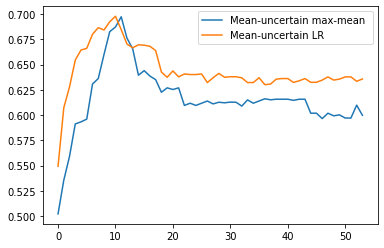

In [582]:
'''Validation process for parameter selection'''
eva_xh['Balanced_acc'].plot(label='Mean-uncertain max-mean ')
eva['Balanced_acc'].plot(label='Mean-uncertain LR')
plt.legend()

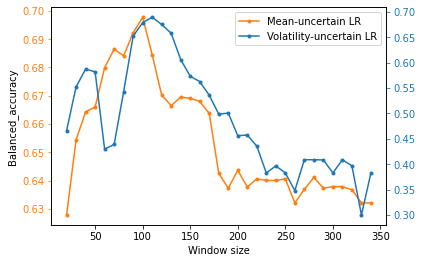

In [542]:
'''Validation process for parameter selection'''
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

h1, =ax.plot(np.array(eva.index)[2:35]*10,eva['Balanced_acc'].iloc[2:35],marker='o',markersize=3,color='tab:orange',label='Mean-uncertain LR')


ax.set_xlabel('Window size')
ax.set_ylabel('Balanced_accuracy')

ax2 = ax.twinx()
h2, = ax2.plot(np.array(eva.index)[2:35]*10,eva_var['Balanced_acc'].iloc[2:35],marker='o',markersize=3,color='tab:blue')

ax.tick_params(axis='y', colors='tab:orange')
ax2.tick_params(axis='y', colors='tab:blue')
ax2.yaxis.label.set_color('tab:blue')

ax.legend([h1,h2],['Mean-uncertain LR','Volatility-uncertain LR'])


In [143]:
def var_evaluate_model(X,y,m,model=LogisticRegression()):
    
    G_m,bacc,f2,rec,pre=list(),list(),list(),list(),list()
   
    for train_index,test_index in cv.split(X,y):
                model.fit(X[train_index],y[train_index])
                prob_y=F_u(m,(np.dot(X[test_index],model.coef_.T)+model.intercept_).reshape(X[test_index].shape[0],))
        
                
                prdict_y=np.round(prob_y)
                rec.append(recall_score(y[test_index],prdict_y))
                pre.append(precision_score(y[test_index],prdict_y))
                G_m.append(np.sqrt(recall_score(y[test_index],prdict_y)*recall_score(y[test_index],prdict_y,pos_label=0)))

                bacc.append(balanced_accuracy_score(y[test_index],prdict_y))
                f2.append(fbeta_score(y[test_index],prdict_y,beta=2))
 
    return G_m,bacc,f2,rec,pre

In [144]:
'''all_results_var reports the performance of volatility-uncertain method on cv sets'''
all_results_var = []
c=1

for k in var_lr:
    result=np.mean(var_evaluate_model(x_tr,y_tr,k),axis=1)
    metric_res = {'window':10*c,'upper_mean': k}
    c+=1
    for name, value in zip(metrics_names, result):
            metric_res[name] = value
       

    all_results_var.append(metric_res)

In [184]:
'''Select the optimal parameter'''
eva_var=pd.DataFrame(all_results_var)
bias=eva_var[eva_var.iloc[:,-4]==(eva_var.iloc[:,-4]).max()]
N_optimal_v=bias['window'].values[0]
print("optimal window size N for volatility-uncertain LR by fivefold CV: %.3f "%(N_optimal_v))


optimal window size N for volatility-uncertain LR by fivefold CV: 120.000 


In [551]:
'''performance of volatility-uncertain LR'''

s_1=time.time()
model_in.fit(x_tr,y_tr)
vola=fsolve(lambda x: equa_v(x,120,0.5*y_tr.shape[0]/sum(y_tr)),[0.5,1.5])
t_1=time.time()
prob_y=F_u(vola,(np.dot(x_te,model_in.coef_.T)+model_in.intercept_).reshape(x_te.shape[0],))
        

prdict_y=np.round(prob_y)
rec=recall_score(y_te,prdict_y)
pre=precision_score(y_te,prdict_y)
#                 bacc_tr.append(balanced_accuracy_score(y[train_index],predict_tr))
bacc=balanced_accuracy_score(y_te,prdict_y)
f1=fbeta_score(y_te,prdict_y,beta=1)
acc_s=np.mean([bacc,rec,f1])
T=t_1-s_1
print('optimal volatility interval:',(vola))
print('>%s: Average Balanced_Acc: %.3f ' % ('volatility-uncertain LR',bacc))
print('>%s: Average F-measure: %.3f' % ('volatility-uncertain LR',f1))
print('>%s: Average Recall: %.3f' % ('volatility-uncertain LR',rec))    
print('>%s: Average Training time: %.3f' % ('volatility-uncertain LR',t_1-s_1))
print('>%s: Average accuracy_score: %.3f' % ('volatility-uncertain LR',acc_s))
print('>%s: Average Score: %.3f' % ('volatility-uncertain LR',0.99*acc_s+0.01/(T*0.9+1)))
          

optimal volatility interval: [3.74495786 7.53573922]
>volatility-uncertain LR: Average Balanced_Acc: 0.685 
>volatility-uncertain LR: Average F-measure: 0.615
>volatility-uncertain LR: Average Recall: 0.533
>volatility-uncertain LR: Average Training time: 3.139
>volatility-uncertain LR: Average accuracy_score: 0.611
>volatility-uncertain LR: Average Score: 0.608


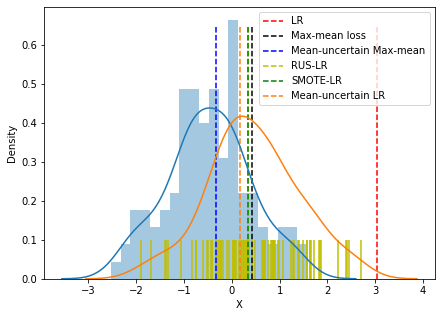

In [580]:
'''Boundary-line of different classifiers'''
plt.figure(figsize=(7,5))
sns.distplot(x_te[u[-200:]==0],bins=20)
sns.distplot(x_te[u[-200:]==1],hist=False)
# plt.vlines(train[train_label==0],0,0.1)
plt.vlines(x_te[u[-200:]==1],0,0.1,'y')
plt.vlines(-model_in.intercept_/model_in.coef_,0,0.65,'r','--',label='LR')
plt.vlines(-w_x_2[1]/w_x_2[0],0,0.65,'k','--',label='Max-mean loss')
plt.vlines((-w_x_2[1]-0.310)/w_x_2[0],0,0.65,'b','--',label='Mean-uncertain Max-mean')
plt.vlines((-model_r.intercept_)/model_r.coef_,0,0.65,'y','--',label='RUS-LR')
plt.vlines((-model_s.intercept_)/model_s.coef_,0,0.65,'g','--',label='SMOTE-LR')
plt.vlines((-w_mle[1]-2.54)/w_mle[0],0,0.65,'tab:orange','--',label='Mean-uncertain LR')
# plt.title('Boundary line of different models')
plt.xlabel('X')

plt.legend()